In [1]:
from lsh_helpers import *
import networkx as nx
import matplotlib.pyplot as plt
import random
import Levenshtein

In [27]:
def build_schema(lshensemble, index_dict):
    sgraph = nx.DiGraph()
    edge_labels={}
    # loop through index dict and search for containment relationships, if found, 
    # add an edge between those 2 tables with edge label as the "join" condition
    for k,v in index_dict.items():
        try:
            candidates = search_index(lshensemble, index_dict, v['table'], v['col'])
        except ZeroDivisionError:
            continue
        if(candidates):
            for c in candidates:
                ctable, ccol = c.split('->')
#                 if(ctable==v['table']):
#                     continue
#                 if(v['table']=='crimes__one_year_prior_to_present' or \
#                    ctable=='crimes__one_year_prior_to_present'):
#                     rnum = random.random()
#                     if(rnum<0.02):
#                         if(Levenshtein.distance(v['table'], ctable)<=len(v['table'])/5):
#                             sgraph.add_edge(v['table'], ctable)
#                             edge_labels[(v['table'], ctable)] = \
#                             (f"{v['col']}---{ccol}", 'blue')
#                         else:
                sgraph.add_edge(v['table'], ctable)
                edge_labels[(v['table'], ctable)] = \
                (f"{v['col']}---{ccol}", 'red')
    
    return edge_labels, sgraph


In [23]:
def draw_graph(sgraph, edge_labels):
    
    pos = nx.circular_layout(sgraph)
    
    edge_colors = []
    
    for e in sgraph.edges:
        edge_colors.append(edges[e][1])
        
    nx.draw(
    sgraph, pos, edge_color=edge_colors, width=1, linewidths=1,
    node_size=20, node_color='pink', alpha=0.9,font_size=6,
    with_labels=True
    )
    
    nx.draw_networkx_edge_labels(
    sgraph, pos,
    edge_labels=edge_labels,
    font_color='black',
    font_size = 4
    )
    
    plt.figure(1, figsize=(1500, 1500), dpi=1000)
    plt.savefig(f'sgraph.png',dpi=1000)
    
#     return edge_labels

In [4]:
# create a graph structure based on containment threshold

In [5]:
if __name__ =='__main__':
    conn = psycopg2.connect("dbname=curation_data_lake user=postgres")
#     conn = psycopg2.connect("dbname=test_hash_db user=postgres")
    conn.autocommit=True
#     create_and_serialize_index(conn, 'april16hashes',num_perm=256, thresh=0.8)

In [6]:
lshensemble, index_dict = load_index(conn, index_table='april16hashes', threshold=0.9,num_perm=256)

/home/opc/chenjie/cs520/lib/python3.6/site-packages/datasketch/lshensemble_partition.py:72: RuntimeWarning: invalid value encountered in true_divide
  return np.sum((float(sizes[u])-sizes[l:u+1])/float(sizes[u])*counts[l:u+1])


In [28]:
edges,graph_obj = build_schema(lshensemble, index_dict)

In [29]:
len(graph_obj.edges)

31475

In [16]:
edges

{('crimes__one_year_prior_to_present',
  'public_health_statistics__screening_for_elevated_blood_lead_lev'): ('WARD---Elevated Blood Lead Level in 2008',
  'red'),
 ('crimes__one_year_prior_to_present',
  'building_code_scofflaw_list'): ('WARD---WARD', 'red'),
 ('crimes__one_year_prior_to_present',
  'chicago_public_schools__school_progress_reports_sy1617'): ('WARD---NWEA_Math_Attainment_Grade_3_Pct',
  'red'),
 ('crimes__one_year_prior_to_present',
  'my_chi_my_future_programs'): ('WARD---Max Age', 'red'),
 ('crimes__one_year_prior_to_present',
  'escooter_trips__census_tract_summary__2020'): ('WARD---End Community Area Number',
  'red'),
 ('crimes__one_year_prior_to_present',
  'violence_reduction__victims_of_homicides_and_nonfatal_shootings'): ('WARD---STATE_HOUSE_DISTRICT',
  'red'),
 ('crimes__one_year_prior_to_present',
  'street_sweeping_schedule__2013'): ('WARD---WARD', 'red'),
 ('crimes__one_year_prior_to_present',
  'table311_service_requests__tree_trims__historical'): ('WARD

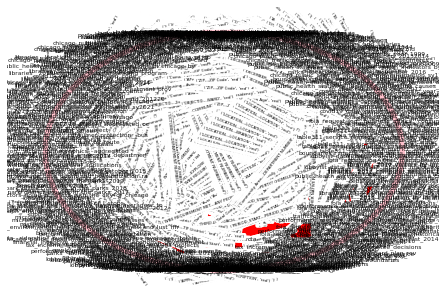

In [30]:
draw_graph(graph_obj, edges)